In [1806]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1807]:
data = pd.read_csv('Dataset/clean_data.csv')
data.head(1)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,return,release_year,crew
0,Toy Story Collection,30000000.0,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995-10-30,...,81.0,English,Released,NaN,Toy story,7.7,5415.0,12.451801,1995,John Lasseter


In [1808]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45452 entries, 0 to 45451
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   budget                 45452 non-null  float64
 2   genres                 43067 non-null  object 
 3   id                     45452 non-null  int64  
 4   original_language      45441 non-null  object 
 5   overview               44511 non-null  object 
 6   popularity             45452 non-null  float64
 7   production_companies   33634 non-null  object 
 8   production_countries   39232 non-null  object 
 9   release_date           45452 non-null  object 
 10  revenue                45452 non-null  float64
 11  runtime                45206 non-null  float64
 12  spoken_languages       41554 non-null  object 
 13  status                 45372 non-null  object 
 14  tagline                20425 non-null  object 
 15  ti

In [1809]:
data.isna().sum().sort_values(ascending=False)

belongs_to_collection    40955
tagline                  25027
production_companies     11818
production_countries      6220
spoken_languages          3898
genres                    2385
overview                   941
crew                       836
runtime                    246
status                      80
original_language           11
popularity                   0
release_date                 0
budget                       0
id                           0
title                        0
vote_average                 0
vote_count                   0
return                       0
release_year                 0
revenue                      0
dtype: int64

Dropeo las que tienen más de la mitad de los datos

In [1810]:
data.drop(columns=['belongs_to_collection', 'tagline'], inplace=True)

Verificaremos duplicados y los dropeamos

In [1811]:
data['id'].value_counts()

id
141971    9
265189    4
119916    4
152795    4
84198     4
         ..
40594     1
23104     1
37605     1
91727     1
461257    1
Name: count, Length: 45346, dtype: int64

In [1812]:
data.drop_duplicates(subset='id', inplace=True)

Usaremos variables principalmente cuantitativas o coheficientes para los modelo por tanto no tomaremos variables relacionadas al lenguaje

No podemos afirmar necesariamente que una película por su fecha o lenguaje influya directamente, tampoco por su duración.

In [1813]:
data.drop(columns=['spoken_languages', 'original_language', 'runtime', 'release_year'], inplace=True)

Tomaremos solo las películas que han salido

In [1814]:
data = data.loc[(data["status"]=="Released")]

In [1815]:
data.drop(columns=['budget','revenue', 'status'], inplace= True)

In [1816]:
data.drop(columns=['return'], inplace= True)

Eliminaremos overview al no usar el lenguaje como modelo.

Las companias, countries, crew son muchas no nos sirven para caracterizar aunque fueran dumies.

Eliminaremos las fechas al no poder afirmar la correlación y al ser tantas incluso en años y los cantidad de votos al no saber como relacionar en base a la puntuación promedio.

In [1817]:
data.drop(columns=['overview', 'production_companies', 'production_countries', 'crew', 'release_date',
                   'vote_count', 'id'], inplace= True)

Crearemos un coheficiente que mida la relación en base a el o los géneros de la película para evitar usar dumies. 
LE TENGO MIEDO A LAS DUMIES :(

In [1818]:
data['genres'] = data['genres'].apply(lambda x: str(x).split(', '))

In [1819]:
data = data.reset_index(drop=True)

In [1820]:
copia = data.copy()

In [1821]:
pelicula = 'Robin hood'

In [1822]:
data.loc[2920]

genres                                            [Animation]
popularity                                           7.556826
title           Pokémon: the first movie: mewtwo strikes back
vote_average                                              6.7
Name: 2920, dtype: object

In [1823]:
indice = data[data['title'] == pelicula].index[0]

In [1824]:
generos = data['genres'][indice]

In [1825]:
data.loc[indice]

genres          [Animation, Family]
popularity                11.179855
title                    Robin hood
vote_average                    7.0
Name: 2900, dtype: object

In [1826]:
coef = []

for h in data['genres']:
    num = 0
    for m in generos:
                
        if(m in h): num += 1
    coef.append(num)
    


In [1827]:
set(coef)

{0, 1, 2}

In [1828]:
data['coef'] = coef
data = data[['coef','popularity','vote_average']]

In [1829]:
X = data.values

In [1830]:
X

array([[2.0000000e+00, 2.1946943e+01, 7.7000000e+00],
       [1.0000000e+00, 1.7015539e+01, 6.9000000e+00],
       [0.0000000e+00, 1.1712900e+01, 6.5000000e+00],
       ...,
       [0.0000000e+00, 9.0300700e-01, 3.8000000e+00],
       [0.0000000e+00, 3.5030000e-03, 0.0000000e+00],
       [0.0000000e+00, 1.6301500e-01, 0.0000000e+00]])

In [1831]:
X

array([[2.0000000e+00, 2.1946943e+01, 7.7000000e+00],
       [1.0000000e+00, 1.7015539e+01, 6.9000000e+00],
       [0.0000000e+00, 1.1712900e+01, 6.5000000e+00],
       ...,
       [0.0000000e+00, 9.0300700e-01, 3.8000000e+00],
       [0.0000000e+00, 3.5030000e-03, 0.0000000e+00],
       [0.0000000e+00, 1.6301500e-01, 0.0000000e+00]])

In [1832]:

reference_point = X[:,0][indice], X[:,1][indice], X[:,2][indice]

# Calcular la distancia euclidiana entre los puntos y el punto de referencia
distances = np.linalg.norm(X - reference_point, axis=1)

# Definir un radio de cercanía para los puntos
radius = 0.6

# Filtrar los puntos cercanos al punto de referencia
nearby_points = X[distances < radius]

# Calcular la distancia euclidiana entre todos los puntos y los nearby points
#distances = np.linalg.norm(X[:, np.newaxis] - nearby_points, axis=2)

# Obtener los índices de los nearby points
#nearby_indices = np.where(np.any(distances < radius, axis=1))[0]

#print("Índices de los nearby points:", nearby_indices)

In [1833]:
ind_min = []
for z,  i in enumerate(nearby_points):
    ind_min.append([sum(abs(reference_point - i)), z])
    
ind_min.sort()
ind_min = [i[1] for i in ind_min][1:6]



In [1834]:
points = nearby_points[ind_min]

In [1835]:
points

array([[ 2.      , 11.183924,  6.9     ],
       [ 2.      , 11.315849,  6.9     ],
       [ 2.      , 10.998646,  6.9     ],
       [ 2.      , 11.213712,  6.7     ],
       [ 2.      , 10.943775,  7.1     ]])

In [1836]:
coordenadas = points[:, 1:]

# Buscar los índices donde las coordenadas coinciden
indices_coincidentes = np.where(np.isin(X[:, 1:], coordenadas).all(axis=1))[0]

print("Índices coincidentes:", indices_coincidentes)

Índices coincidentes: [ 1926  8201 19684 22672 24316]


In [1837]:
print(reference_point)
for i in indices_coincidentes:
    print(copia.loc[i])

(2.0, 11.179855, 7.0)
genres          [Comedy, Animation, Family]
popularity                        11.183924
title             The great mouse detective
vote_average                            6.9
Name: 1926, dtype: object
genres              [Animation, Comedy, Family]
popularity                            11.213712
title           The spongebob squarepants movie
vote_average                                6.7
Name: 8201, dtype: object
genres          [Fantasy, Animation, Family]
popularity                         10.943775
title                  Rise of the guardians
vote_average                             7.1
Name: 19684, dtype: object
genres          [Animation, Comedy, Family]
popularity                        10.998646
title                 Dug's special mission
vote_average                            6.9
Name: 22672, dtype: object
genres          [Animation, Family]
popularity                11.315849
title             Hawaiian vacation
vote_average                    6.9
Name

In [1838]:
X[:,0][indice], X[:,1][indice], X[:,2][indice]

(2.0, 11.179855, 7.0)

In [1839]:
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (12,10))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y, alpha = 0.02)
    ax.scatter(X[:,0][indice], X[:,1][indice], X[:,2][indice], c='black', s=800, marker = '+')
    for i in nearby_points:
        ax.scatter(i[0], i[1], i[2], c='red', s=20)
    

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')


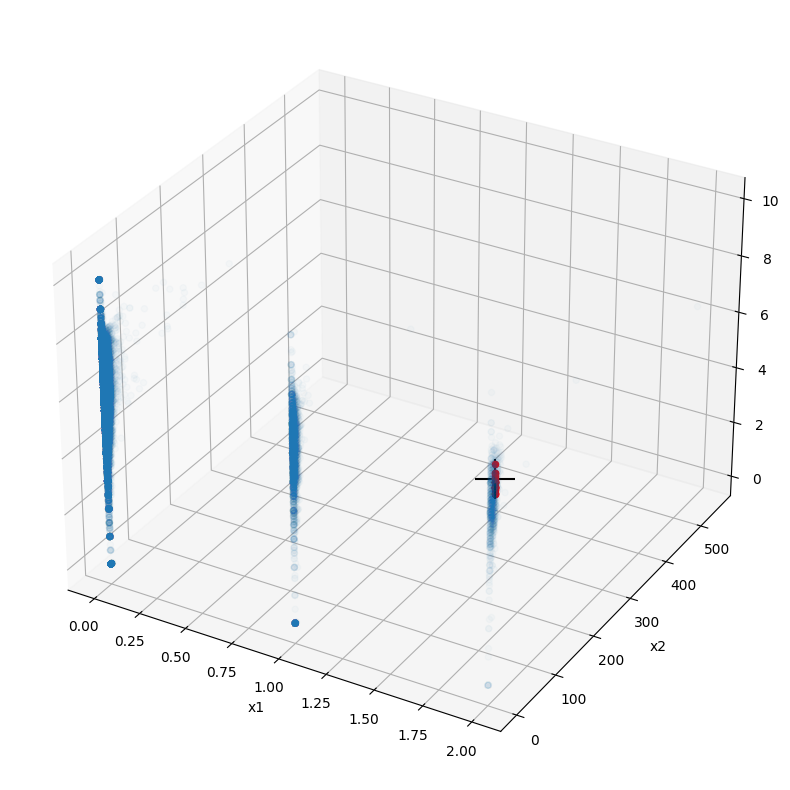

In [1840]:
plot_3d_scatter(X[:,0], X[:,1], X[:,2], ax=None, fig = None)